<a href="https://colab.research.google.com/github/dacardonave/COVID-19/blob/master/An%C3%A1lisis_China_Regresi%C3%B3n_Lineal_Simple_Covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresion Lineal Simple

## Analitica de datos
#### Daniel Cardona Velasquez
#### Universidad Nacional De Colombia

A continuacion se presenta el analisis y diseño de un modelo de regresion simple ya implementados por algunas librerias de python para el entrenamiento de un modelo predictivo. En este caso en particualar, trabajaremos en una base de datos sobre el Covd-19 en china, previamente filtrada y depurada para su entrenamiento. 

El modelo predictivo sera entrenado con los datos que se tienen de contagiados en china hasta el 18 de marzo de 2020 y bucara predecir el numero de los contagiados futuros.


In [0]:
#Importando algunas librerias de tratamiento y representacion
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [0]:
#Cargando el dataset sobre el que vamos a trabajar
data=pd.read_csv("china.csv")
data.tail()

,Country,Date,Confirmed,Deaths,Recovered
52,Mainland China,2020-03-14,80827.0,3189.0,65572.0
53,Mainland China,2020-03-15,80848.0,3199.0,66926.0
54,Mainland China,2020-03-16,80867.0,3213.0,67816.0
55,Mainland China,2020-03-17,80884.0,3226.0,68700.0
56,Mainland China,2020-03-18,80906.0,3237.0,69653.0


In [0]:
# Convirtiendo algunos datos para su manipulacion
data["Confirmed"] = data['Confirmed'].astype(np.int64)
data["Deaths"] = data['Deaths'].astype(np.int64)
data["Recovered"] = data['Recovered'].astype(np.int64)
data = data.drop(['Country'], axis=1)


In [0]:
data.head()


,Date,Confirmed,Deaths,Recovered
0,2020-01-22,547,17,28
1,2020-01-23,639,18,30
2,2020-01-24,916,26,36
3,2020-01-25,1399,42,39
4,2020-01-26,2062,56,49


Text(0.5, 1.0, 'Evolucion de los casos confirmados en el tiempo')

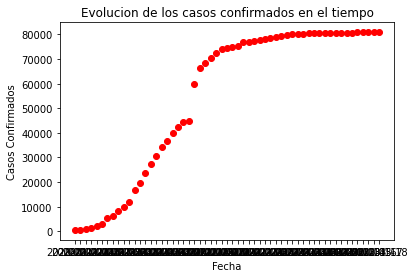

In [0]:
%matplotlib inline
plt.scatter(data["Date"], data["Confirmed"], color='r' )
plt.xlabel('Fecha')
plt.ylabel('Casos Confirmados')
plt.title('Evolucion de los casos confirmados en el tiempo')


En la grafica anterior podemos ver el comportamiento de los casos confirmados en china en el el transcurso del 2020. se puede apreciar un comportamiento exponencial que al final termina aplanandose y volviendose logaritmico

In [0]:
# Codificando los datos tipo fecha
from sklearn.preprocessing import LabelEncoder
for c in data.columns:
    if data[c].dtype == 'object':
        print(c)
        lbl = LabelEncoder()
        lbl.fit(list(data[c].values)) 
        data[c] = lbl.transform(list(data[c].values))
        

Date


In [0]:
data.head()


,Date,Confirmed,Deaths,Recovered
0,0,547,17,28
1,1,639,18,30
2,2,916,26,36
3,3,1399,42,39
4,4,2062,56,49


In [0]:
from sklearn.model_selection import train_test_split

#conjunto de testing y validacion
X_train, X_test = train_test_split(data,test_size=0.2)
col_sal = "Confirmed"
y_train = X_train[col_sal]
y_test = X_test[col_sal]
X_train.drop(columns=col_sal,inplace=True)
X_test.drop(columns=col_sal,inplace=True)
print(X_train.shape)
print(X_test.shape)


(45, 3)
(12, 3)


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [0]:
X_train.head()

,Date,Deaths,Recovered
11,11,361,463
42,42,2981,49955
31,31,2441,22687
56,56,3237,69653
22,22,1368,6213


### Linear Regression de scikit learn

EL modelo que analizaremos sera la regresion lieal de scikit learn.

LinearRegression ajusta un modelo lineal con coeficientes w = (w1, ..., wp) para minimizar la suma residual de cuadrados entre los objetivos observados en el conjunto de datos y los objetivos predichos por la aproximación lineal.

In [0]:
from sklearn.linear_model import LinearRegression


A continuacion se incorporaran dos funciones adicionales de la libreria Sklearn que hacen un mapeo al dataset y ayudan a seleccionar las mejores variables predictoras para el modelo

In [0]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR


In [0]:
# Seleccionando las variables predictoras
estimator = SVR(kernel="linear")
selector = RFE(estimator, 2, step=1)
selector = selector.fit(X_train,y_train)


In [0]:
# Con que variables se ha quedado el modelo?
selector.support_ 


array([ True,  True, False])

In [0]:
# Las variables seleccionadas siempre aparecen con un 1, las demas van numerandose en orden de significancia
selector.ranking_ 


array([1, 1, 2])

Las variables seleccionadas por el selector y el estimador fueron ("Date" y "Deaths")

In [0]:
#Entrenando el modelo
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
#Coeficiente de intercepto de la ecuacion 
lm.intercept_

-4399.108917208527

In [0]:
#Coeficientes que acompañan a Date y Deaths y Recovered en la ecuacion
lm.coef_ 

array([ 1.26314658e+03,  2.80660633e+01, -1.07045979e+00])

In [0]:
#Valor de R2 ajustado
lm.score(X_train, y_train)

0.9911100562866088

In [0]:
# Testeo del modelo
confirmed_pred = lm.predict(X_test)
confirmed_pred

array([ 2172.72441107, 79784.42109043, 83689.58834289, 30705.84313784,
       -3951.95871433, 80449.00914466,  6748.30840834, 15207.0908243 ,
       47083.63790611, 24871.77003177, 82074.4859442 , 67397.20148538])

In [0]:
# Diferencia entre los datos originales y las predicciones del modelo
SSD = sum((y_test- confirmed_pred)**2)
SSD

112661132.94408484

In [0]:
# Error estandar de los residuos
RSE = np.sqrt(SSD/(len(y_test)-2-1))
RSE

3538.0649598974114

In [0]:
#Calculando el error del modelo
confirmed_mean = np.mean(y_test)
error = RSE/confirmed_mean
print("El error del modelo es del", error*100, "% aproximadamente")

El error del modelo es del 8.371261782225973 % aproximadamente


In [0]:
X = data.drop(columns="Confirmed")
Y = data["Confirmed"]
X.shape, Y.shape

((57, 3), (57,))

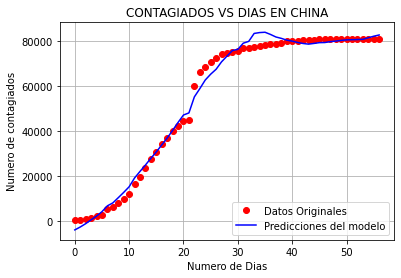

In [0]:
%matplotlib inline
lab=["Datos Originales", "Predicciones del modelo"]
plt.plot(Y,'ro')
plt.plot(lm.predict(X),color = 'blue')
plt.title("CONTAGIADOS VS DIAS EN CHINA")
plt.xlabel("Numero de Dias")
plt.ylabel("Numero de contagiados")
plt.legend(labels=lab)
plt.grid()


La linea azul representa el modelo y los puntos rojos son los datos originales que el modelo intenta seguir. Vemos que un modelo lineal intenta seguirlo pero puede no ser el mas eficiente para predecir el comportamiento del COVID-19